In [1]:
import os 
from scipy.io import wavfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from __future__ import print_function
import librosa
import scipy

In [2]:
filename = './data/1022-a_n.wav'

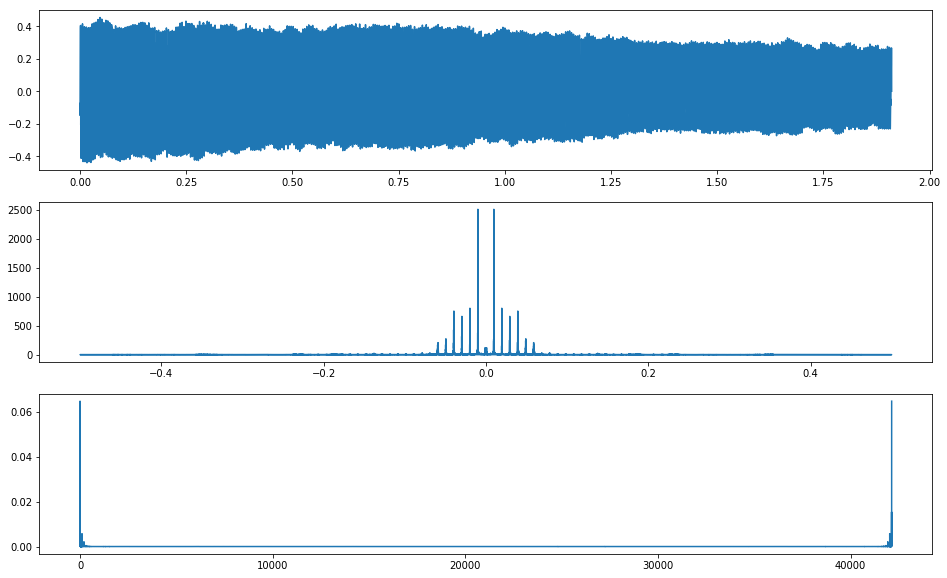

In [5]:
y, sr = librosa.load(filename)
N = len(y)
t = np.arange(0,N,1)/sr

plt.figure(figsize=(16,10))
plt.subplot(3,1,1)
plt.plot(t,y)

fft = np.fft.fft(y)
fft = np.abs(fft)
freq = np.fft.fftfreq(t.shape[-1])
plt.subplot(3,1,2)
plt.plot(freq, fft)
cep = np.power(np.abs(np.fft.ifft(np.log10(fft))),2)
plt.subplot(3,1,3)
plt.plot(cep)

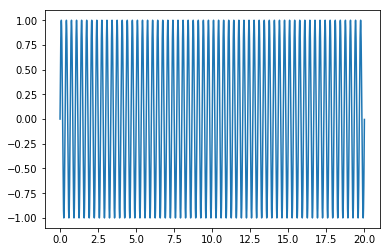

In [9]:
Fs = 5000
f = 3
N = 100000
t = np.arange(N)/Fs
sin = np.sin(2*np.pi*f*t)
plt.plot(t,sin)

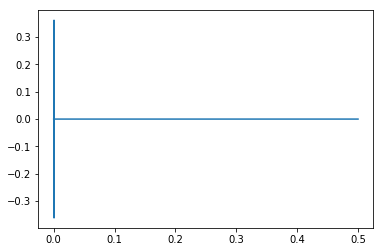

In [35]:
fft = np.fft.fft(sin)
freq = np.fft.fftfreq(N)
plt.plot(freq[0:round(N/2)], fft.real[0:round(N/2)])

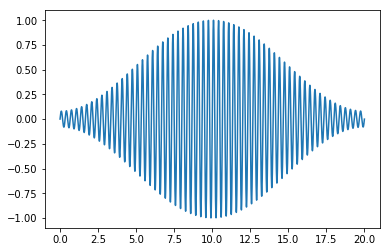

In [34]:
sin = sin*scipy.signal.windows.hamming(N)
plt.plot(t,sin)

In [6]:
from __future__ import division
from numpy.fft import rfft
from numpy import argmax, mean, diff, log
from matplotlib.mlab import find
from scipy.signal import blackmanharris, fftconvolve
from time import time
import sys

In [7]:
def freq_from_autocorr(sig, fs):
    """
    Estimate frequency using autocorrelation
    """
    # Calculate autocorrelation (same thing as convolution, but with
    # one input reversed in time), and throw away the negative lags
    corr = fftconvolve(sig, sig[::-1], mode='full')
    corr = corr[len(corr)//2:]

    # Find the first low point
    d = diff(corr)
    start = find(d > 0)[0]

    # Find the next peak after the low point (other than 0 lag).  This bit is
    # not reliable for long signals, due to the desired peak occurring between
    # samples, and other peaks appearing higher.
    # Should use a weighting function to de-emphasize the peaks at longer lags.
    peak = argmax(corr[start:]) + start
    px, py = parabolic(corr, peak)

    return fs / px

In [8]:
def parabolic(f, x):
    """Quadratic interpolation for estimating the true position of an
    inter-sample maximum when nearby samples are known.
   
    f is a vector and x is an index for that vector.
   
    Returns (vx, vy), the coordinates of the vertex of a parabola that goes
    through point x and its two neighbors.
   
    Example:
    Defining a vector f with a local maximum at index 3 (= 6), find local
    maximum if points 2, 3, and 4 actually defined a parabola.
   
    In [3]: f = [2, 3, 1, 6, 4, 2, 3, 1]
   
    In [4]: parabolic(f, argmax(f))
    Out[4]: (3.2142857142857144, 6.1607142857142856)
   
    """
    xv = 1/2. * (f[x-1] - f[x+1]) / (f[x-1] - 2 * f[x] + f[x+1]) + x
    yv = f[x] - 1/4. * (f[x-1] - f[x+1]) * (xv - x)
    return (xv, yv)

In [27]:
def freq_from_fft(sig, fs):
    """
    Estimate frequency from peak of FFT
    """
    # Compute Fourier transform of windowed signal
    windowed = sig * blackmanharris(len(sig))
    f = rfft(windowed)

    # Find the peak and interpolate to get a more accurate peak
    i = argmax(abs(f))  # Just use this for less-accurate, naive version
    true_i = parabolic(log(abs(f)), i)[0]

    # Convert to equivalent frequency
    return fs * true_i / len(windowed)

In [29]:
freq_from_fft(y,sr)

216.40943468039669

[Text(0,0,'Maks'),
 Text(0,0,'Min'),
 Text(0,0,'RMS'),
 Text(0,0,'Kurt'),
 Text(0,0,'Skos')]

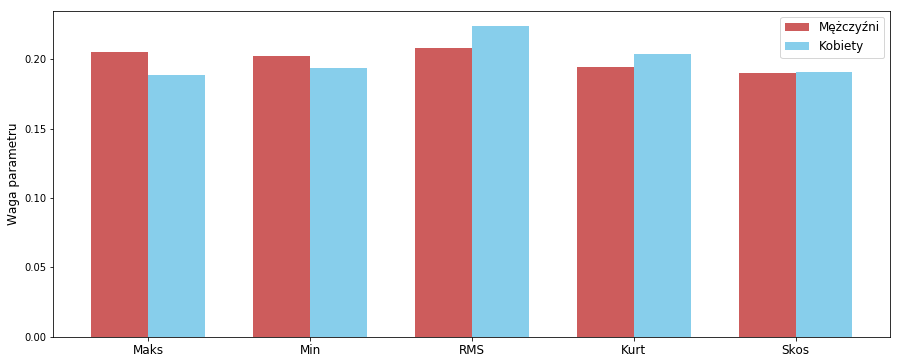

In [5]:
men = [0.20545541, 0.20224119, 0.20777742, 0.19476624, 0.18975974]
women = [0.18840492, 0.19336553, 0.22382722, 0.20388715, 0.19051518]
fig, ax = plt.subplots()
fig.set_size_inches(15, 6)
plt.grid(b=False)
ind = np.arange(len(men))  # the x locations for the groups
width = 0.35  # the width of the bars
ax.bar(ind - width/2, men, width, color='IndianRed', label='Mężczyźni')
ax.bar(ind + width/2, women, width, color='SkyBlue', label='Kobiety')
ax.legend(fontsize=12)
ax.set_ylabel('Waga parametru', fontsize=12)
ax.set_xticks(ind)
ax.set_xticklabels(['Maks', 'Min', 'RMS', 'Kurt', 'Skos'], fontsize=12)

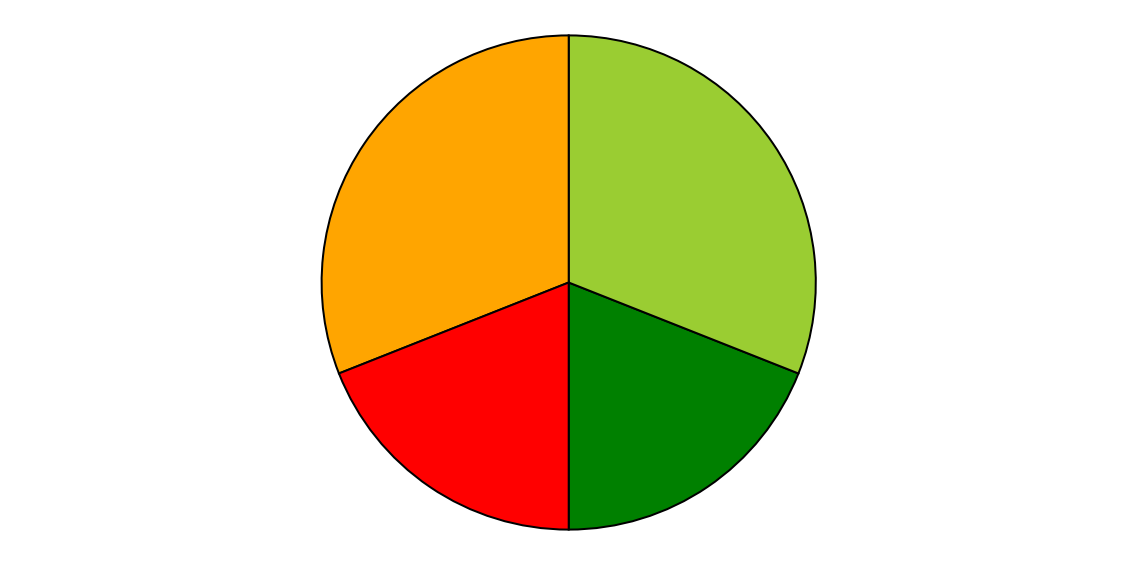

In [4]:
import matplotlib.pyplot as plt
 
labels = ['Mężczyżni zdrowi', 'Kobiety zdrowe',  'Kobiety chore', 'Mężczyżni chorzy']
sizes = [19, 31, 31, 19]
colors = ['green', 'yellowgreen',  'orange', 'r']
plt.figure(figsize=(20,10))
patches, texts = plt.pie(sizes, colors=colors, startangle=270)

plt.axis('equal')
for w in patches:
    w.set_linewidth(2)
    w.set_edgecolor('black')

plt.show()

[Text(0,0,'MFCC1'),
 Text(0,0,'MFCC2'),
 Text(0,0,'MFCC3'),
 Text(0,0,'MCCC4'),
 Text(0,0,'MFCC5'),
 Text(0,0,'MFCC6'),
 Text(0,0,'MFCC7'),
 Text(0,0,'MFCC8'),
 Text(0,0,'MFCC9'),
 Text(0,0,'MFCC10'),
 Text(0,0,'RMS'),
 Text(0,0,'ZCR'),
 Text(0,0,'F0'),
 Text(0,0,'Maks'),
 Text(0,0,'Min'),
 Text(0,0,'Kurt'),
 Text(0,0,'Skos')]

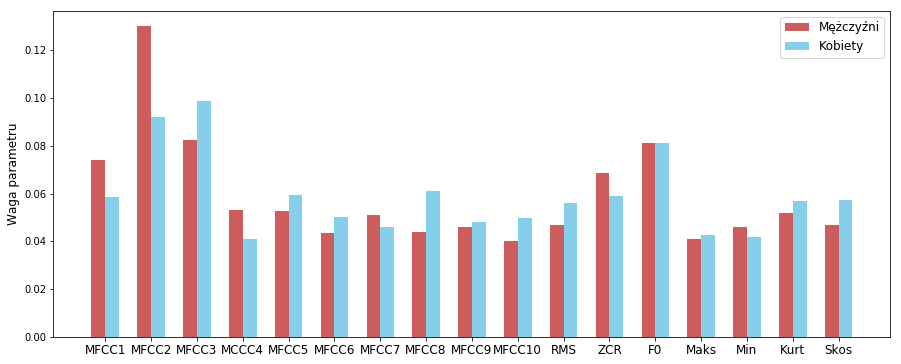

In [30]:
women = [0.05858517, 0.09208046, 0.09883162, 0.04109639, 0.0592858 ,
       0.05015795, 0.04614054, 0.06117025, 0.04822381, 0.04994085,
       0.05597525, 0.05875444, 0.08118257, 0.04268151, 0.04166638,
       0.05676   , 0.05746701]
men = [0.07387215, 0.13006133, 0.08256579, 0.05318664, 0.05283197,
       0.04351431, 0.05089112, 0.04398917, 0.04616392, 0.04020882,
       0.04682772, 0.06864629, 0.08130839, 0.04107737, 0.04617463,
       0.05198001, 0.04670036]
fig, ax = plt.subplots()
fig.set_size_inches(15, 6)
plt.grid(b=False)
ind = np.arange(len(men))  # the x locations for the groups
width = 0.3  # the width of the bars
ax.bar(ind - width/2, men, width, color='IndianRed', label='Mężczyźni')
ax.bar(ind + width/2, women, width, color='SkyBlue', label='Kobiety')
ax.legend(fontsize=12)
ax.set_ylabel('Waga parametru', fontsize=12)
ax.set_xticks(ind)
ax.set_xticklabels(['MFCC1', 'MFCC2', 'MFCC3', 'MCCC4', 'MFCC5', 'MFCC6', 'MFCC7', 'MFCC8',
                    'MFCC9', 'MFCC10', 'RMS', 'ZCR', 'F0', 'Maks', 'Min', 'Kurt',
                    'Skos',], fontsize=12)

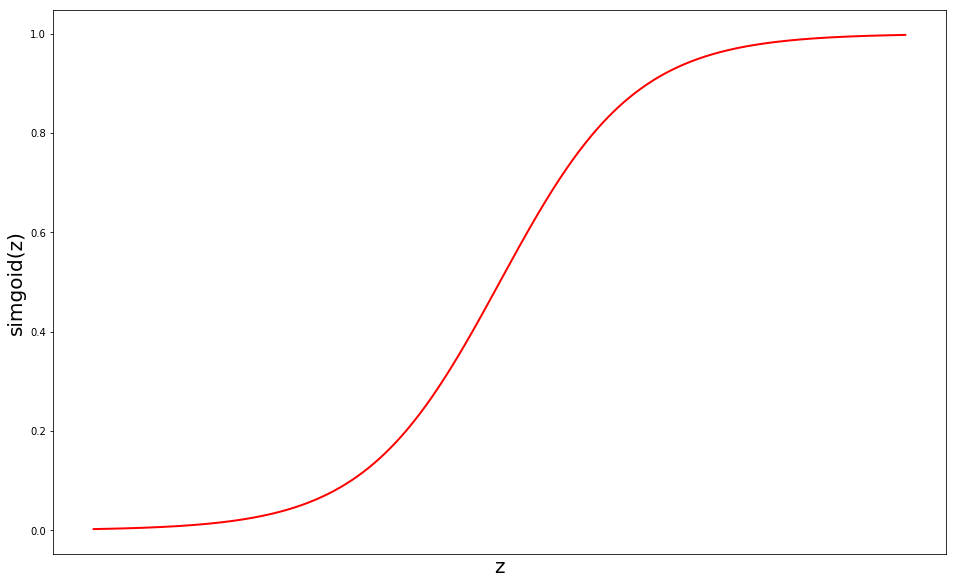

In [16]:
def boltzman(x, xmid, tau):
    """
    evaluate the boltzman function with midpoint xmid and time constant tau
    over x
    """
    return 1. / (1. + np.exp(-(x-xmid)/tau))

plt.figure(figsize=(16,10))
x = np.arange(-6, 6, .01)
S = boltzman(x, 0, 1)
Z = 1-boltzman(x, 0.5, 1)
plt.plot(x, S, color='red', lw=2)
plt.xlabel('z', fontsize=20)
plt.ylabel('simgoid(z)', fontsize=20)
plt.xticks([])
plt.show()

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=3)
pca.fit(allpatients.drop(['Status'], axis=1))
X = pca.transform(allpatients.drop(['Status'], axis=1))
X = pd.DataFrame(X, columns=['A','B','C'])
X['Status'] = allpatients['Status']

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
fig.set_size_inches(16, 10.5)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[X['Status']=='Zdrowy']['A'],
           X[X['Status']=='Zdrowy']['B'],
           X[X['Status']=='Zdrowy']['C'],
           s=100,
           c='r',
           marker='o',
           label='Zdrowy')
ax.scatter(X[X['Status']=='Chory']['A'],
           X[X['Status']=='Chory']['B'],
           X[X['Status']=='Chory']['C'],
           s=100,
           c='b',
           marker='v',
           label='Chory')
plt.legend(loc='upper right', frameon = True, fontsize=20)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_zticklabels([])
ax.set_xlabel('Pierwsza główna składowa', fontsize=20)
ax.set_ylabel('Druga główna składowa', fontsize=20)
ax.set_zlabel('Trzecia główna składowa', fontsize=20)
plt.show()

In [ ]:
feature_importance = rf_model.feature_importances_

fig, ax = plt.subplots()
fig.set_size_inches(15.5, 8)
plt.grid(b=False)
ind = np.arange(len(feature_importance))  # the x locations for the groups
width = 0.4  # the width of the bars
ax.bar(ind, feature_importance, width, color='IndianRed')
ax.set_ylabel('Waga parametru', fontsize=12)
ax.set_xticks(ind)
ax.set_xticklabels(['MFCC1', 'MFCC2', 'MFCC3', 'MCCC4', 'MFCC5', 'MFCC6', 'MFCC7', 'MFCC8',
       'MFCC9', 'MFCC10', 'RMS', 'ZCR', 'F0', 'Maks', 'Min', 'Kurt',
       'Skos'], fontsize=12)